
# Look at association of genetic status @ session 1

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import nilearn as nil
import seaborn as sns
import nibabel as nib
from scipy import io as sio
import statsmodels.api as sm
from nilearn import plotting as nlp
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.sandbox.stats import multicomp as smi

/home/surchs/Venv/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

In [6]:
# Paths
model_path = '/data1/guilimin/simons_vip/pheno/dataset_16p_session1.csv'
part_tmp = '/data1/guilimin/simons_vip/subtype/subtypes3_16p_session1/network_{0}/network_{0}_subtype.mat'
weights_path = '/data1/guilimin/simons_vip/subtype/subtypes3_16p_session1/subtype_weights.mat'
sbt_map_temp= '/data1/guilimin/simons_vip/subtype/subtypes3_16p_session1/network_{}/mean_subtype.nii.gz'

n_sbt = 3
n_net = 12

In [14]:
model = pd.read_csv(model_path, delimiter=',')

In [17]:
# Load the things
for n_id in range(n_net):
    tmp = sio.loadmat(part_tmp.format(n_id+1))
    part = tmp['part']
    model['net_{}'.format(n_id+1)] = part.flatten().astype(int)

In [18]:
model.head()

,Unnamed: 0,frames_scrubbed.,frames_OK,FD,FD_scrubbed,session,sex,family,age_zscore,age_months,...,net_3,net_4,net_5,net_6,net_7,net_8,net_9,net_10,net_11,net_12
0,s14702xx3xFCAP1_session1_rest,39,79,0.305145,0.227978,session1,male,14702,1.687134,95,...,1,2,2,2,3,3,2,1,3,3
1,s14714xx18xFCAP1_session1_rest,8,110,0.129200,0.118603,session1,male,14714,-0.208128,249,...,2,3,3,2,3,3,2,1,3,3
2,s14723xx17xFCAP1_session1_rest,51,67,0.241232,0.139836,session1,male,14723,1.178221,60,...,1,3,1,3,3,2,3,3,3,3
3,s14725xx48xFCAP1_session1_rest,35,83,0.342359,0.249759,session1,male,14725,0.335883,415,...,2,1,1,2,2,3,3,1,2,2
4,s14729xx5xFCAP1_session1_rest,35,83,0.228533,0.158575,session1,male,14729,1.757329,99,...,3,2,3,2,3,3,3,1,3,1


In [31]:
sp.stats.chi2_contingency(pd.crosstab(index=model.genetic, columns=model.net_8))

(2.7588511201854105,
 0.59895640518012971,
 4,
 array([[  5.96491228,   6.84210526,   7.19298246],
        [ 22.36842105,  25.65789474,  26.97368421],
        [  5.66666667,   6.5       ,   6.83333333]]))

In [42]:
for n_id in range(n_net):
    ctab = pd.crosstab(index=model.genetic, columns=model['net_{}'.format(n_id+1)])
    res = sp.stats.chi2_contingency(ctab)
    print('Net {} has p {:.4f}'.format(n_id+1, res[1]))

Net 1 has p 0.0049
Net 2 has p 0.0247
Net 3 has p 0.5308
Net 4 has p 0.3748
Net 5 has p 0.6780
Net 6 has p 0.6157
Net 7 has p 0.0095
Net 8 has p 0.5990
Net 9 has p 0.0845
Net 10 has p 0.1842
Net 11 has p 0.0402
Net 12 has p 0.0186


In [47]:
otab = pd.crosstab(index=model.genetic, columns=model.net_1)
etab = sp.stats.chi2_contingency(otab)[3]

In [48]:
otab

net_1,1,2,3
genetic,,,
1,6,1,13
2,11,29,35
3,2,2,15


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3dbd995f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb3dbd84ef0>], dtype=object)

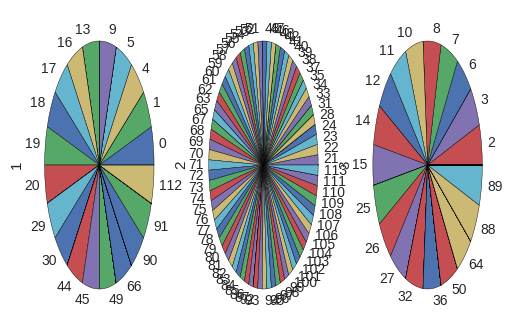

In [65]:
model['genetic'].apply(pd.value_counts).plot(kind='pie', subplots=True, legend=False)

In [71]:
grouped = model.groupby('genetic')

In [ ]:
for 

In [79]:
a = model.groupby(['net_1',])['genetic'].value_counts()

In [85]:
a.keys()

MultiIndex(levels=[[1, 2, 3], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [1, 0, 2, 1, 2, 0, 1, 2, 0]],
           names=['net_1', 'genetic'])

In [94]:
otab.shape

(3, 3)

In [97]:
otab.shape

(3, 3)

In [99]:
otab

net_1,1,2,3
genetic,,,
1,6,1,13
2,11,29,35
3,2,2,15


In [ ]:
model['genetic'].value_counts().plot(ax=ax, kind='bar')

In [110]:
otab

net_1,1,2,3
genetic,,,
1,6,1,13
2,11,29,35
3,2,2,15


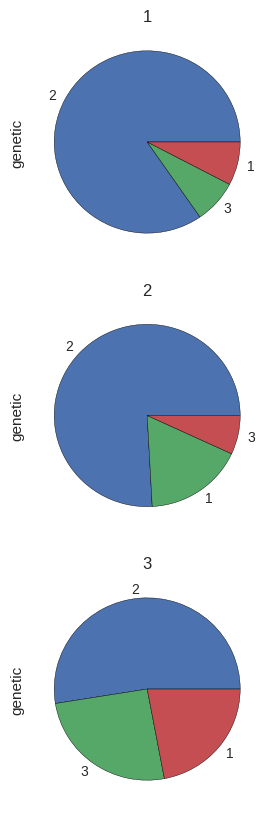

In [112]:
f = plt.figure(figsize=(3,10))
gs = gridspec.GridSpec(3, 1, hspace=0.2)
for pid, (name, group) in enumerate(model.groupby(['net_2'])):
    ax = f.add_subplot(gs[pid, 0])
    group['genetic'].value_counts().plot(kind='pie', ax=ax)
    ax.set_title(name)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3db03c278>], dtype=object)

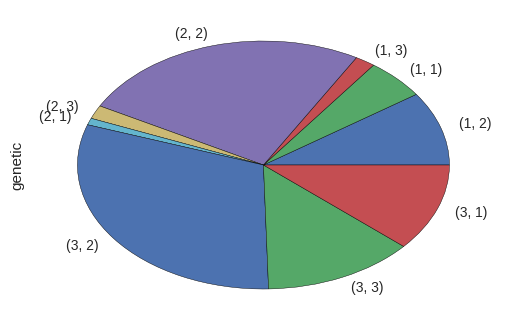

In [103]:
model.groupby(['net_1',])['genetic'].value_counts().plot(kind='pie', subplots=True)

In [63]:
model_out = '/data1/guilimin/simons_vip/pheno/model_with_subtypes.csv'
model.to_csv(model_out, index=False)

In [49]:
etab

array([[  3.33333333,   5.61403509,  11.05263158],
       [ 12.5       ,  21.05263158,  41.44736842],
       [  3.16666667,   5.33333333,  10.5       ]])

In [50]:
otab - etab

net_1,1,2,3
genetic,,,
1,2.666667,-4.614035,1.947368
2,-1.500000,7.947368,-6.447368
3,-1.166667,-3.333333,4.500000
